In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import os

# Results

In [14]:
main_root = os.getcwd()

In [3]:
root = main_root + '\\GeneSets\\TransferredLinksPPI\\1StepKernel_20genes\\Results'

In [4]:
samples = len(os.listdir(root))

In [5]:
result_example = root + '\\model_gset_set_0\\all\\f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

results = pd.DataFrame(index = antibiotics, columns = range(samples))

In [6]:
for i in range(samples):
    result_file = root + f'\\model_gset_set_{i}\\all\\f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)

In [7]:
random_results = results.drop(0 , axis=1)

In [8]:
random_results.T

,ALL,AMP,AUG,AXO,CHL,FIS,FOX,GEN,KAN,STR,TET,TIO
1,0.739,0.724,0.73,0.741,0.563,0.753,0.692,0.628,0.594,0.72,0.766,0.741
2,0.756,0.714,0.735,0.772,0.66,0.751,0.75,0.621,0.597,0.762,0.759,0.769
3,0.754,0.723,0.76,0.752,0.589,0.784,0.741,0.639,0.609,0.733,0.751,0.776
4,0.733,0.716,0.729,0.737,0.577,0.753,0.722,0.623,0.554,0.698,0.711,0.737
5,0.749,0.722,0.768,0.764,0.536,0.744,0.774,0.682,0.635,0.708,0.75,0.768
6,0.758,0.721,0.778,0.757,0.651,0.775,0.732,0.668,0.593,0.736,0.73,0.758
7,0.738,0.761,0.742,0.727,0.482,0.798,0.707,0.674,0.563,0.727,0.761,0.755
8,0.718,0.723,0.731,0.717,0.501,0.76,0.703,0.63,0.58,0.723,0.718,0.712
9,0.732,0.706,0.722,0.747,0.588,0.762,0.705,0.627,0.531,0.68,0.713,0.726
10,0.747,0.735,0.722,0.722,0.587,0.739,0.742,0.641,0.614,0.714,0.779,0.752


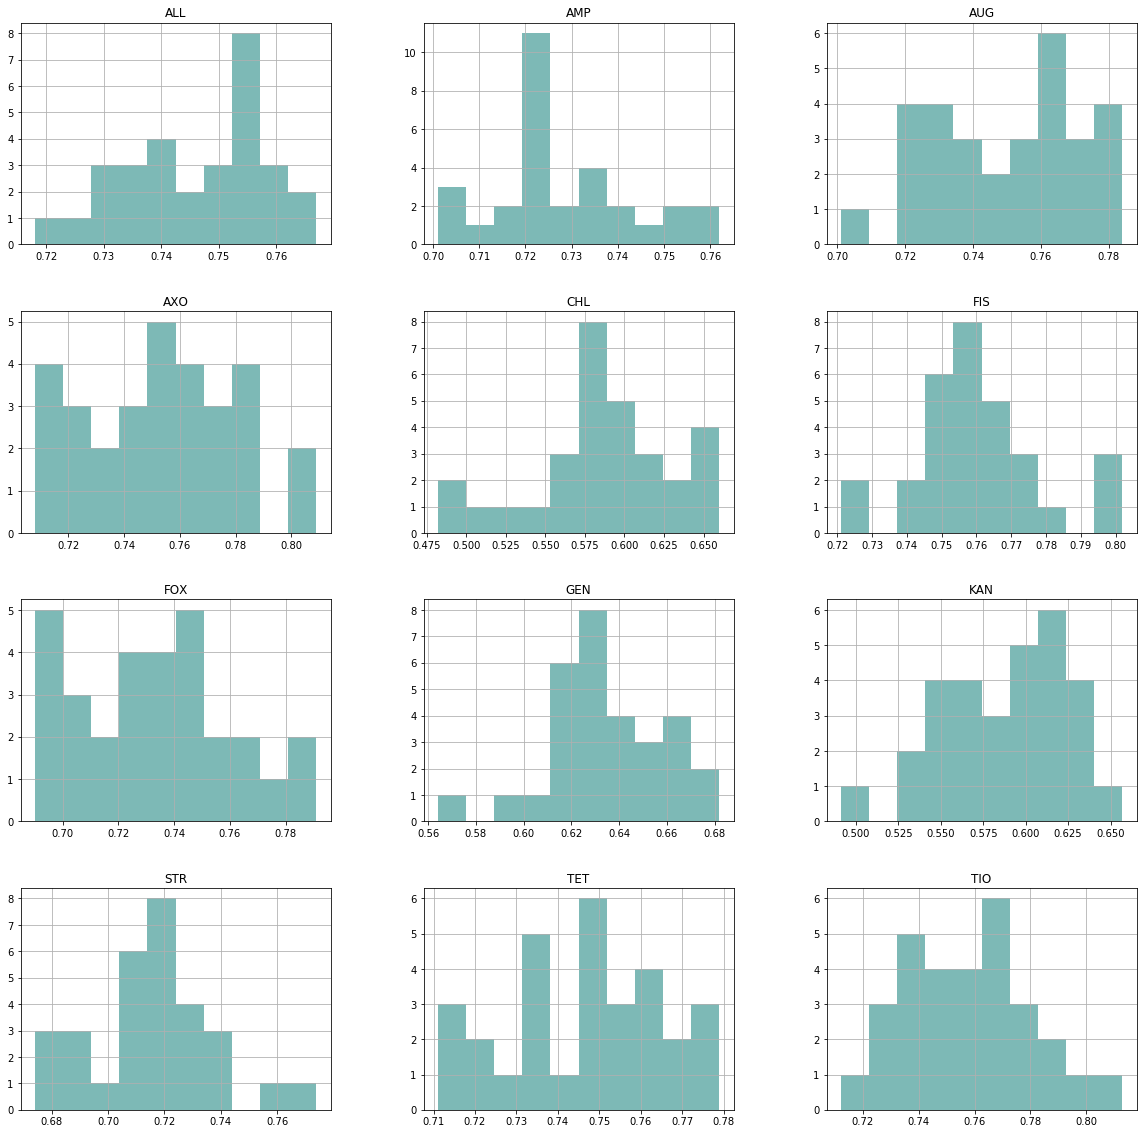

In [19]:
fig = random_results.astype(float).T.hist(figsize = (20, 20), color = '#7DB9B6')

In [11]:
df = pd.concat([results[0], results.mean(axis = 1), results.std(axis = 1)], axis = 1)
df.columns = ['F1 highest kernel', 'Mean F1 - random', 'Std F1 - random']

In [12]:
df

,F1 highest kernel,Mean F1 - random,Std F1 - random
ALL,0.724,0.745581,0.012622
AMP,0.676,0.726710,0.018047
AUG,0.75,0.750194,0.021558
AXO,0.738,0.753355,0.025761
CHL,0.54,0.583613,0.045920
FIS,0.741,0.760452,0.018825
FOX,0.705,0.731645,0.027670
GEN,0.623,0.632742,0.024933
KAN,0.546,0.585806,0.037050
STR,0.729,0.716226,0.022464


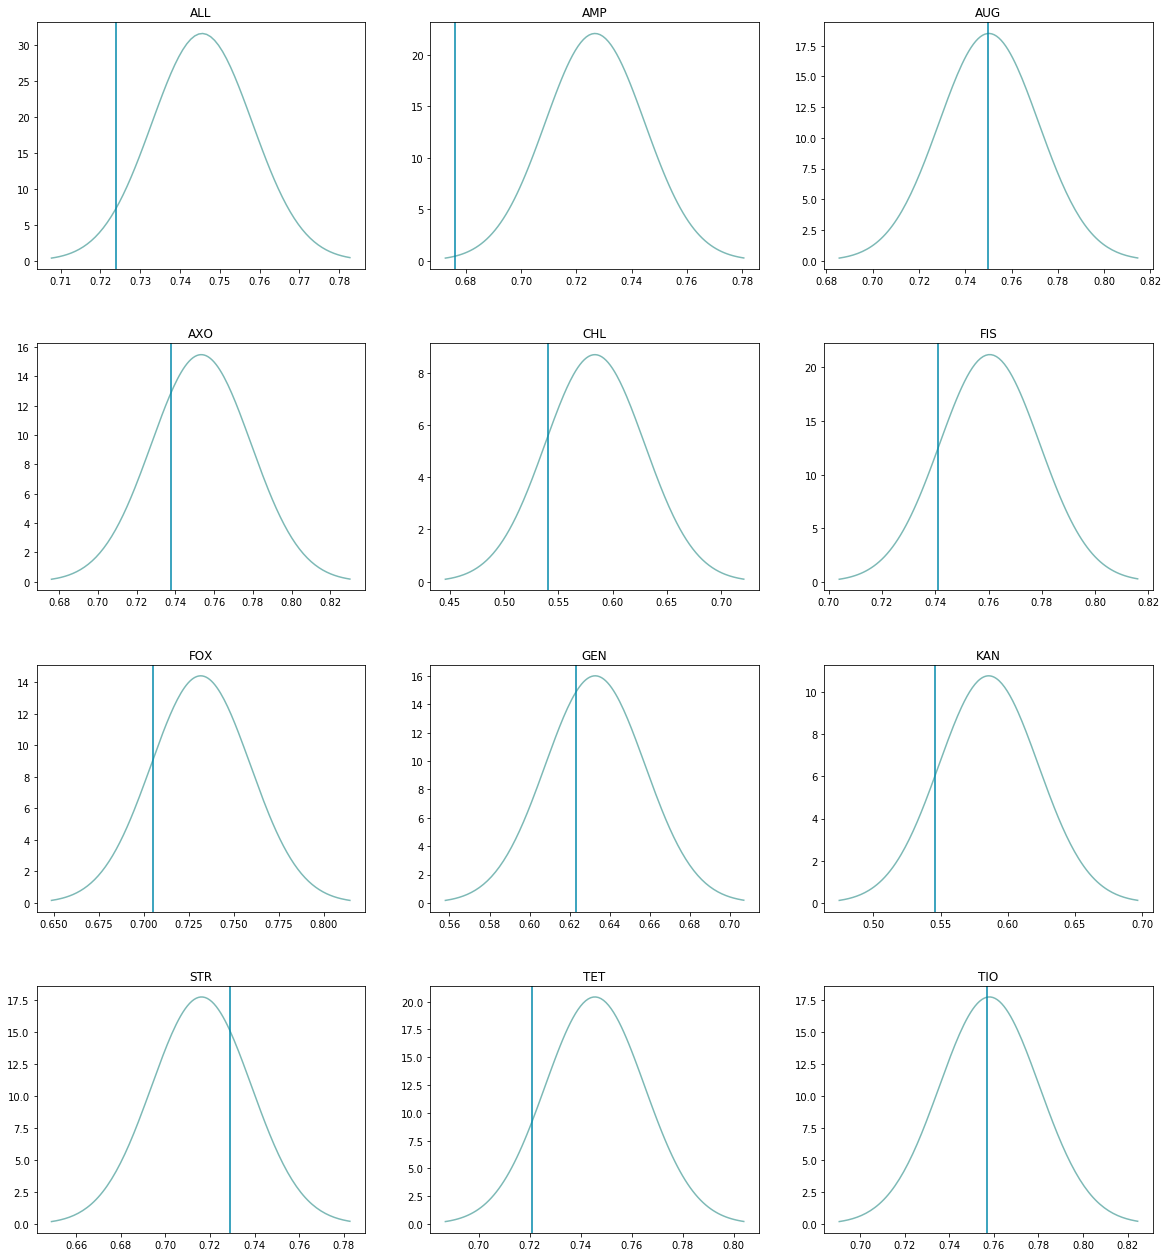

In [22]:
figure, axis = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))


for row in range(4):
    for col in range(3):
        axis[row, col].set_title(antibiotics[3*row+col])
        line = 3*row+col
        value = df['F1 highest kernel'][line]
        m = df['Mean F1 - random'][line]
        s = df['Std F1 - random'][line]
        x_axis =(np.arange(m - 3*s, m + 3*s, 0.001))
        axis[row, col].plot(x_axis, norm.pdf(x_axis, m, s), color = '#7DB9B6')
        axis[row, col].axvline(x = value, color = '#0088aa', label = 'axvline - full height')
        axis[row, col].set_title(antibiotics[3*row+col])

        
plt.subplots_adjust(top = 0.999, bottom=0.01, hspace=0.3, wspace=0.2)